In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os

Using TensorFlow backend.


In [2]:
#  Load the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Format our training data by normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
x_train /= 255
x_test /= 255

In [6]:
batch_size = 32
num_classes = 10
epochs = 10

In [7]:
# Now we one hot encode outputs
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
# initiate RMSprop optimizer and configure some parameters
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [10]:
# Let's create our model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

**Training Our Model**

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose = 1,
                    validation_data=(x_test,y_test),
                   shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 284us/step - loss: 1.8517 - acc: 0.3191 - val_loss: 1.5951 - val_acc: 0.4216
Epoch 2/10
50000/50000 [==============================] - 10s 190us/step - loss: 1.5055 - acc: 0.4541 - val_loss: 1.3937 - val_acc: 0.5015
Epoch 3/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.3593 - acc: 0.5157 - val_loss: 1.2306 - val_acc: 0.5682
Epoch 4/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.2592 - acc: 0.5511 - val_loss: 1.1550 - val_acc: 0.5950
Epoch 5/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.1848 - acc: 0.5785 - val_loss: 1.0941 - val_acc: 0.6178
Epoch 6/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.1171 - acc: 0.6078 - val_loss: 1.0611 - val_acc: 0.6258
Epoch 7/10
50000/50000 [==============================] - 10s 190us/step - loss: 1.0601 - acc: 0.6275 - val_loss: 1.025

In [12]:
model.save('cifar_cnn_2.h5')
# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 65us/step
Test loss: 0.8613991292953491
Test accuracy: 0.7029


**Plotting our Accuracy and Loss Charts**

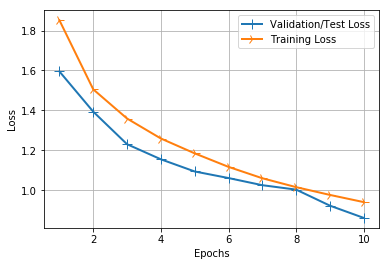

In [13]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

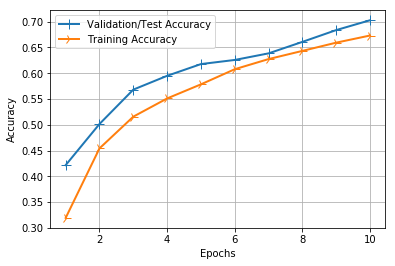

In [14]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/cifar_simple_cnn.h5')
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
              
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

OSError: Unable to open file (unable to open file: name = '/home/deeplearningcv/DeepLearningCV/Trained Models/cifar_simple_cnn.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)